# Classification of Normal/Abnormal Heart Sound Recordings 

## Logistic regression

Last changed: 3 January 2019

<br>
This exercise was mainly to setup the Python and Matlab environment.

---

## Background

In this notebook we use **logistic regression** as starting point. The feature table from the Heart Sound Classification demo from Matlab [link](https://nl.mathworks.com/matlabcentral/fileexchange/65286-heart-sound-classifier) is used. This feature table (.mat file) is loaded in Matlab2018b and saved as csv file as follows: <br>

```matlab
  load('FeatureTable.mat');
  writetable(feature_table,'feature_table.csv');
```

The Matab demo feature table is extracted from the Physionet 2016 challenge dataset [link](https://www.physionet.org/physiobank/database/challenge/2016/).


---

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from IPython.display import Image
from IPython.display import display, Markdown, Latex

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.1.


### Import dataset and explore

In [3]:
path = './Data/feature_table.csv'
feature_table = pd.read_csv(path)

In [4]:
feature_table.head()

,meanValue,medianValue,standardDeviation,meanAbsoluteDeviation,quantile25,quantile75,signalIQR,sampleSkewness,sampleKurtosis,signalEntropy,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,class
0,-0.000027,0.000153,0.020330,0.012280,-0.008377,0.008209,0.016586,1.448406,21.147144,-2.765938,...,-2.514937,-3.142967,-1.963752,-0.113152,-0.284882,1.621789,-0.533383,-1.692560,-2.023930,Abnormal
1,-0.000004,0.000061,0.021358,0.012943,-0.007904,0.008148,0.016052,0.598251,16.506547,-2.701691,...,-1.742107,-4.678335,-2.733229,2.393984,0.100006,2.916759,-1.341317,-0.905575,-1.491379,Abnormal
2,0.000016,0.000366,0.021588,0.013572,-0.009216,0.008530,0.017746,1.039007,14.776147,-2.643367,...,-0.553855,-1.351164,-2.250663,1.132156,-0.426723,2.394257,1.594562,-2.093305,-1.369329,Abnormal
3,-0.000079,-0.000153,0.019643,0.012688,-0.009018,0.008606,0.017624,0.788818,13.674144,-2.716049,...,-0.740283,-4.181773,-2.078157,1.825690,0.865000,2.492632,-0.916560,-0.552540,-2.229849,Abnormal
4,0.000004,0.000488,0.023276,0.012722,-0.007202,0.007385,0.014587,1.282866,21.825459,-2.770344,...,-0.820515,-5.892187,-2.024111,1.519565,-0.647076,3.923026,-0.563399,-1.758184,-0.482701,Abnormal


In [5]:
list(feature_table.columns.values)

['meanValue',
 'medianValue',
 'standardDeviation',
 'meanAbsoluteDeviation',
 'quantile25',
 'quantile75',
 'signalIQR',
 'sampleSkewness',
 'sampleKurtosis',
 'signalEntropy',
 'spectralEntropy',
 'dominantFrequencyValue',
 'dominantFrequencyMagnitude',
 'dominantFrequencyRatio',
 'MFCC1',
 'MFCC2',
 'MFCC3',
 'MFCC4',
 'MFCC5',
 'MFCC6',
 'MFCC7',
 'MFCC8',
 'MFCC9',
 'MFCC10',
 'MFCC11',
 'MFCC12',
 'MFCC13',
 'class']

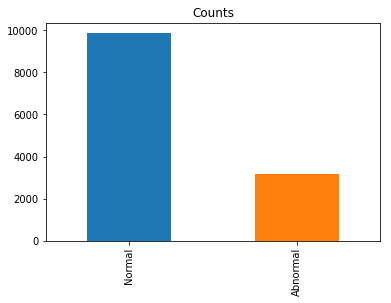

In [6]:
feature_table['class'].value_counts().plot(kind='bar', title='Counts');

In [7]:
count_class_Normal, count_class_Abnormal = feature_table['class'].value_counts()
print("Class normal: ", count_class_Normal)
print("Class abnormal: ", count_class_Abnormal)

Class normal:  9857
Class abnormal:  3158


Imbalanced dataset!!<br>

### Resampling: undersampling

ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [8]:
# Divide by class
feature_class_normal = feature_table[feature_table['class'] == 'Normal']
feature_class_abnormal = feature_table[feature_table['class'] == 'Abnormal']

In [9]:
# Take random sample
feature_class_normal_resampled = feature_class_normal.sample(count_class_Abnormal)

# Make a new dataframe
feature_class_new = pd.concat([feature_class_normal_resampled,feature_class_abnormal], axis=0)

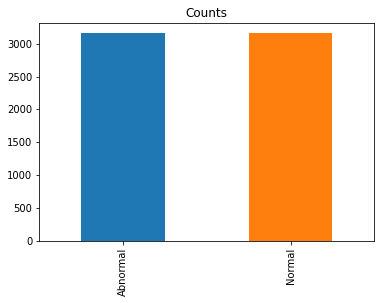

In [10]:
feature_class_new['class'].value_counts().plot(kind='bar', title='Counts');

In [11]:
feature_class_new.head()

,meanValue,medianValue,standardDeviation,meanAbsoluteDeviation,quantile25,quantile75,signalIQR,sampleSkewness,sampleKurtosis,signalEntropy,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,class
11302,0.000963,0.000000,0.086063,0.050007,-0.024353,0.026215,0.050568,-0.061955,10.297674,-1.384033,...,-0.701309,-1.323119,-1.401872,-2.076248,-1.251874,-0.453849,-0.621182,-0.718139,-1.451375,Normal
6147,0.000609,0.001251,0.024716,0.014767,-0.006256,0.008759,0.015015,-0.309087,10.059148,-2.599371,...,-1.634217,-4.883352,-1.104637,-2.896575,-2.351507,-2.137519,1.415421,1.453503,1.235296,Normal
7742,-0.032288,-0.079254,0.279098,0.226338,-0.256165,0.143066,0.399231,0.702402,2.965686,-0.003680,...,7.646973,4.553234,2.493661,2.987152,0.884343,0.936788,0.902060,-0.870464,-1.018189,Normal
8980,-0.001620,0.000000,0.063421,0.037483,-0.019043,0.019043,0.038086,-0.116829,10.199838,-1.652951,...,-1.019481,-4.808982,-4.666833,-4.141780,-5.089423,-3.215191,-4.060230,-1.788272,-0.937960,Normal
1697,-0.000023,-0.000183,0.020845,0.011114,-0.005585,0.005234,0.010818,0.572427,13.416892,-2.959460,...,-0.207804,-2.806821,-3.907502,-1.545304,0.829336,-0.183150,-0.653662,0.131851,-0.465509,Normal


In [12]:
feature_class_new.tail()

,meanValue,medianValue,standardDeviation,meanAbsoluteDeviation,quantile25,quantile75,signalIQR,sampleSkewness,sampleKurtosis,signalEntropy,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,class
12945,-0.000114,-0.000153,0.073433,0.036330,-0.013794,0.013641,0.027435,0.187218,21.943346,-1.769403,...,-4.514827,-3.654369,-2.894184,-2.416417,-2.157816,-2.305586,-1.638064,-3.455712,-4.722525,Abnormal
12946,-0.000076,-0.000183,0.060047,0.026811,-0.008179,0.007782,0.015961,0.026994,29.870055,-2.141102,...,-5.183497,-3.407145,-2.476017,-0.427822,0.104405,1.338580,0.390721,-1.937271,-4.508401,Abnormal
12947,0.000058,-0.000092,0.081123,0.045613,-0.021027,0.023071,0.044098,-0.052115,16.636730,-1.477438,...,-3.951066,-3.750865,-3.227256,-1.938907,-2.133228,-1.107326,-2.593893,-2.686808,-3.687934,Abnormal
12948,-0.000010,0.000183,0.087266,0.049656,-0.022186,0.021866,0.044052,0.069718,14.843785,-1.405545,...,-3.572673,-3.869641,-1.967090,-2.914589,-1.551325,-2.034377,-1.192088,-2.780467,-4.146332,Abnormal
12949,0.000064,-0.000458,0.088657,0.052913,-0.028778,0.027618,0.056396,0.237620,13.454629,-1.297616,...,-3.304326,-2.355090,-2.210567,-1.455906,-2.413876,-1.636757,-3.683986,-4.644729,-3.897828,Abnormal


In [13]:
# Save the resampled feature table
feature_class_new.to_csv('./Data/feature_table_resampled.csv')

In [14]:
# Convert class string to number
# ref: https://stackoverflow.com/questions/42684530/convert-a-column-in-a-python-pandas-from-string-month-into-int
# make a dictionary
# class_name = {'Normal': 0, 'Abnormal': 1}
# print(class_name)

# apply map
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
# feature_class_new['class'] = feature_class_new['class'].map(class_name)

### Logistic regression

ref: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [15]:
feature_cols = list(feature_class_new.columns.values)[:-1]
print(feature_cols)

['meanValue', 'medianValue', 'standardDeviation', 'meanAbsoluteDeviation', 'quantile25', 'quantile75', 'signalIQR', 'sampleSkewness', 'sampleKurtosis', 'signalEntropy', 'spectralEntropy', 'dominantFrequencyValue', 'dominantFrequencyMagnitude', 'dominantFrequencyRatio', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13']


In [16]:
X = feature_class_new[feature_cols]
y = feature_class_new['class']

In [17]:
# Take ratio 75:25
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

# Model evaluation: confusion matrix
class_labels = ["Normal", "Abnormal"]
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = class_labels)
print(cnf_matrix)

[[631 154]
 [117 677]]


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# ref.: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[631 154]
 [117 677]]
Normalized confusion matrix
[[0.80382166 0.19617834]
 [0.14735516 0.85264484]]


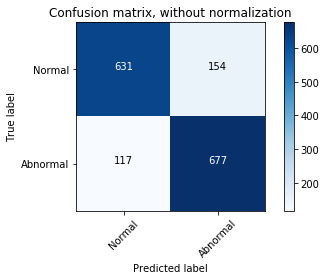

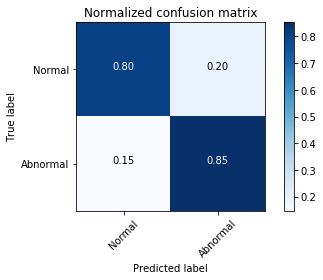

In [20]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ref: https://en.wikipedia.org/wiki/Confusion_matrix

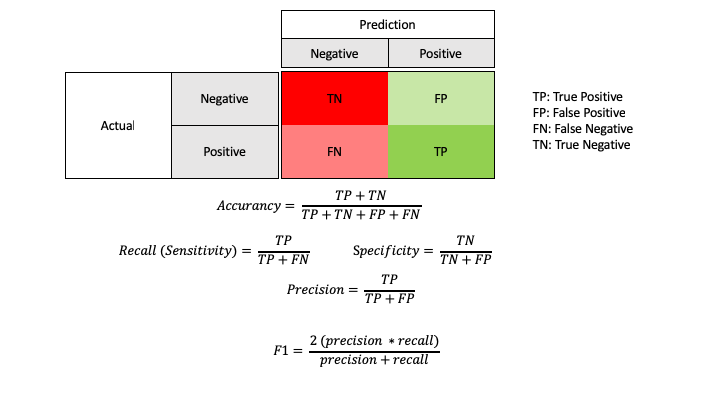

In [21]:
display(Markdown('ref: https://en.wikipedia.org/wiki/Confusion_matrix'))
Image("img/confusion_matrix.png")

In [22]:
print("Accuracy:",100*round(metrics.accuracy_score(y_test, y_pred),3))

Accuracy: 82.8


In [23]:
TN = cnf_matrix[0,0]
TP = cnf_matrix[1,1]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]

Sensitivity = TP/(TP+FN)
Precision   = TP/(TP+FP)
F1 = 2*(Precision*Sensitivity)/(Precision+Sensitivity)


print("Score F1:", round(F1,2))

display(Markdown('Of all patients where we predicted abnormal heart sound, what fraction has abnormal heart sound.'))
print("Precision:", 100*round(Precision,2),"%")

display(Markdown('Of all patients that have abnormal heart sound, what fraction did we correctly detect.'))
print("Recall/Sensitivity:", 100*round(Sensitivity,3),"%")


Score F1: 0.83


Of all patients where we predicted abnormal heart sound, what fraction has abnormal heart sound.

Precision: 81.0 %


Of all patients that have abnormal heart sound, what fraction did we correctly detect.

Recall/Sensitivity: 85.3 %


---

## Interlude: Matlab R2018b Statistics and Machine Learning Toolbox

The same feature table is provided as input to the Classification Learner [link](https://nl.mathworks.com/help/stats/classificationlearner-app.html).<br>

MATLAB Version: 9.5.0.944444 (R2018b)<br>
Statistics and Machine Learning Toolbox               Version 11.4 (R2018b)

Matlab2018b code:

  ```matlab
  % load feature table
  feature_table = readtable('feature_table_resampled.csv');
  % run classification learner
  classificationLearner
  ```

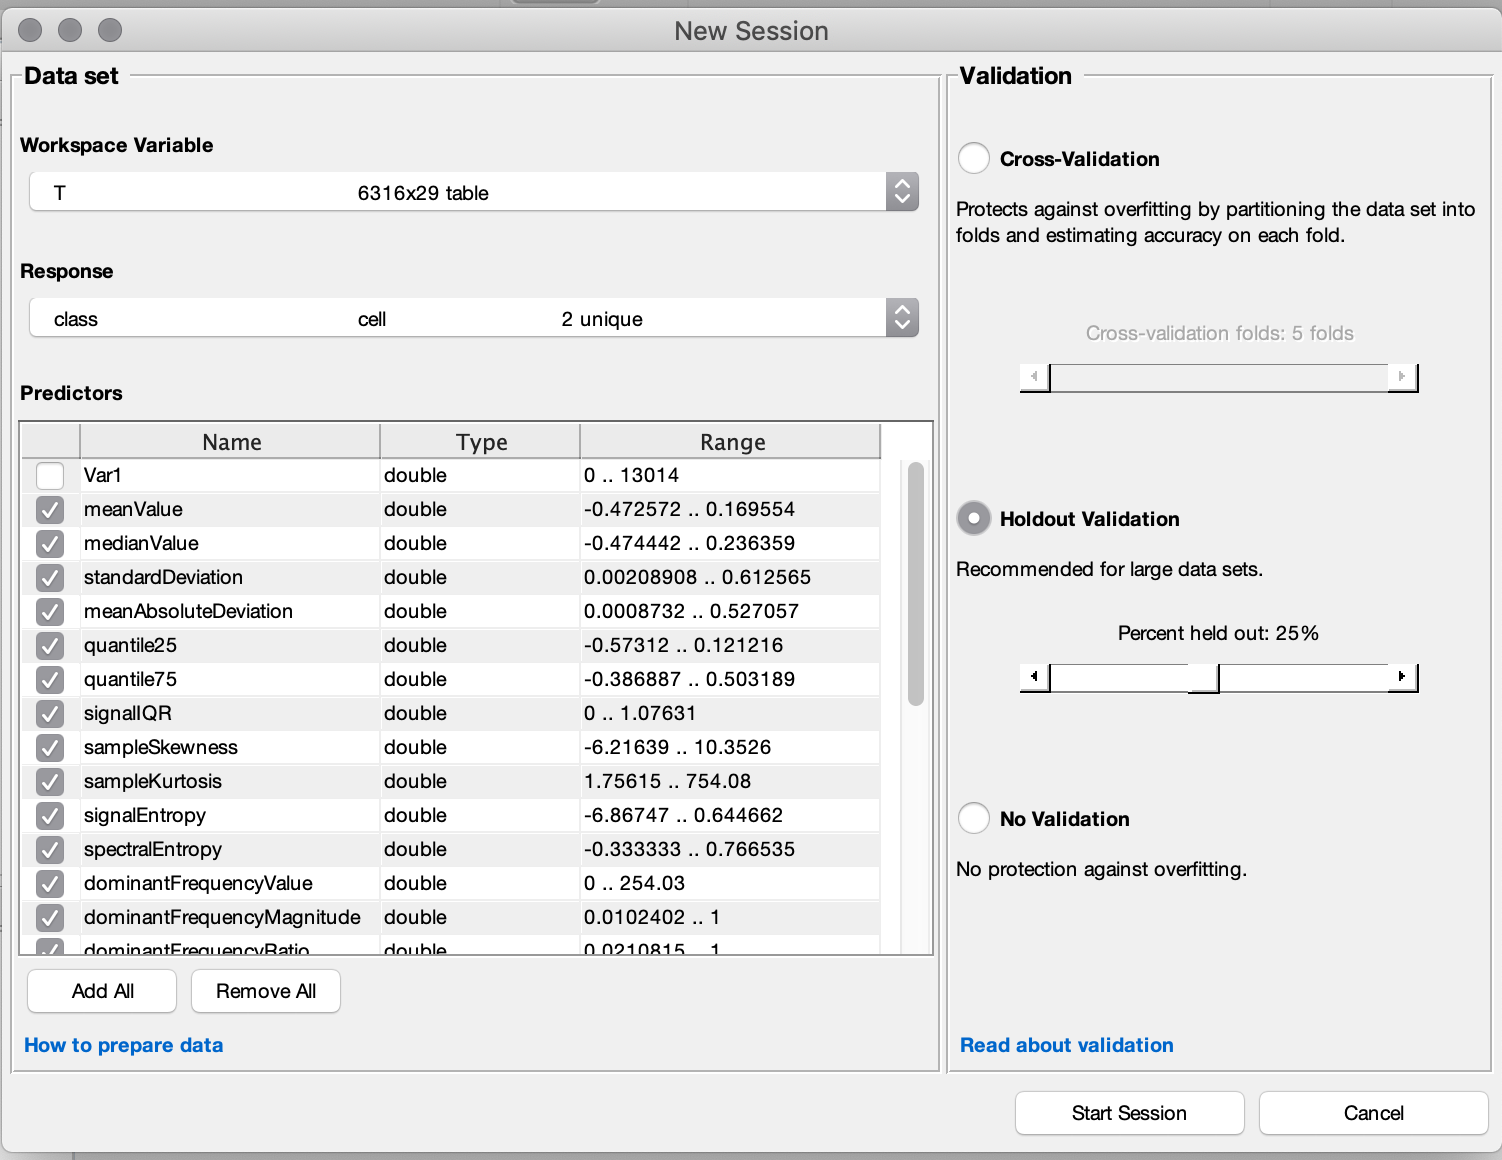

In [27]:
Image("img/Classification Learner 1.png")

Var1 was not selected there it is not a features.

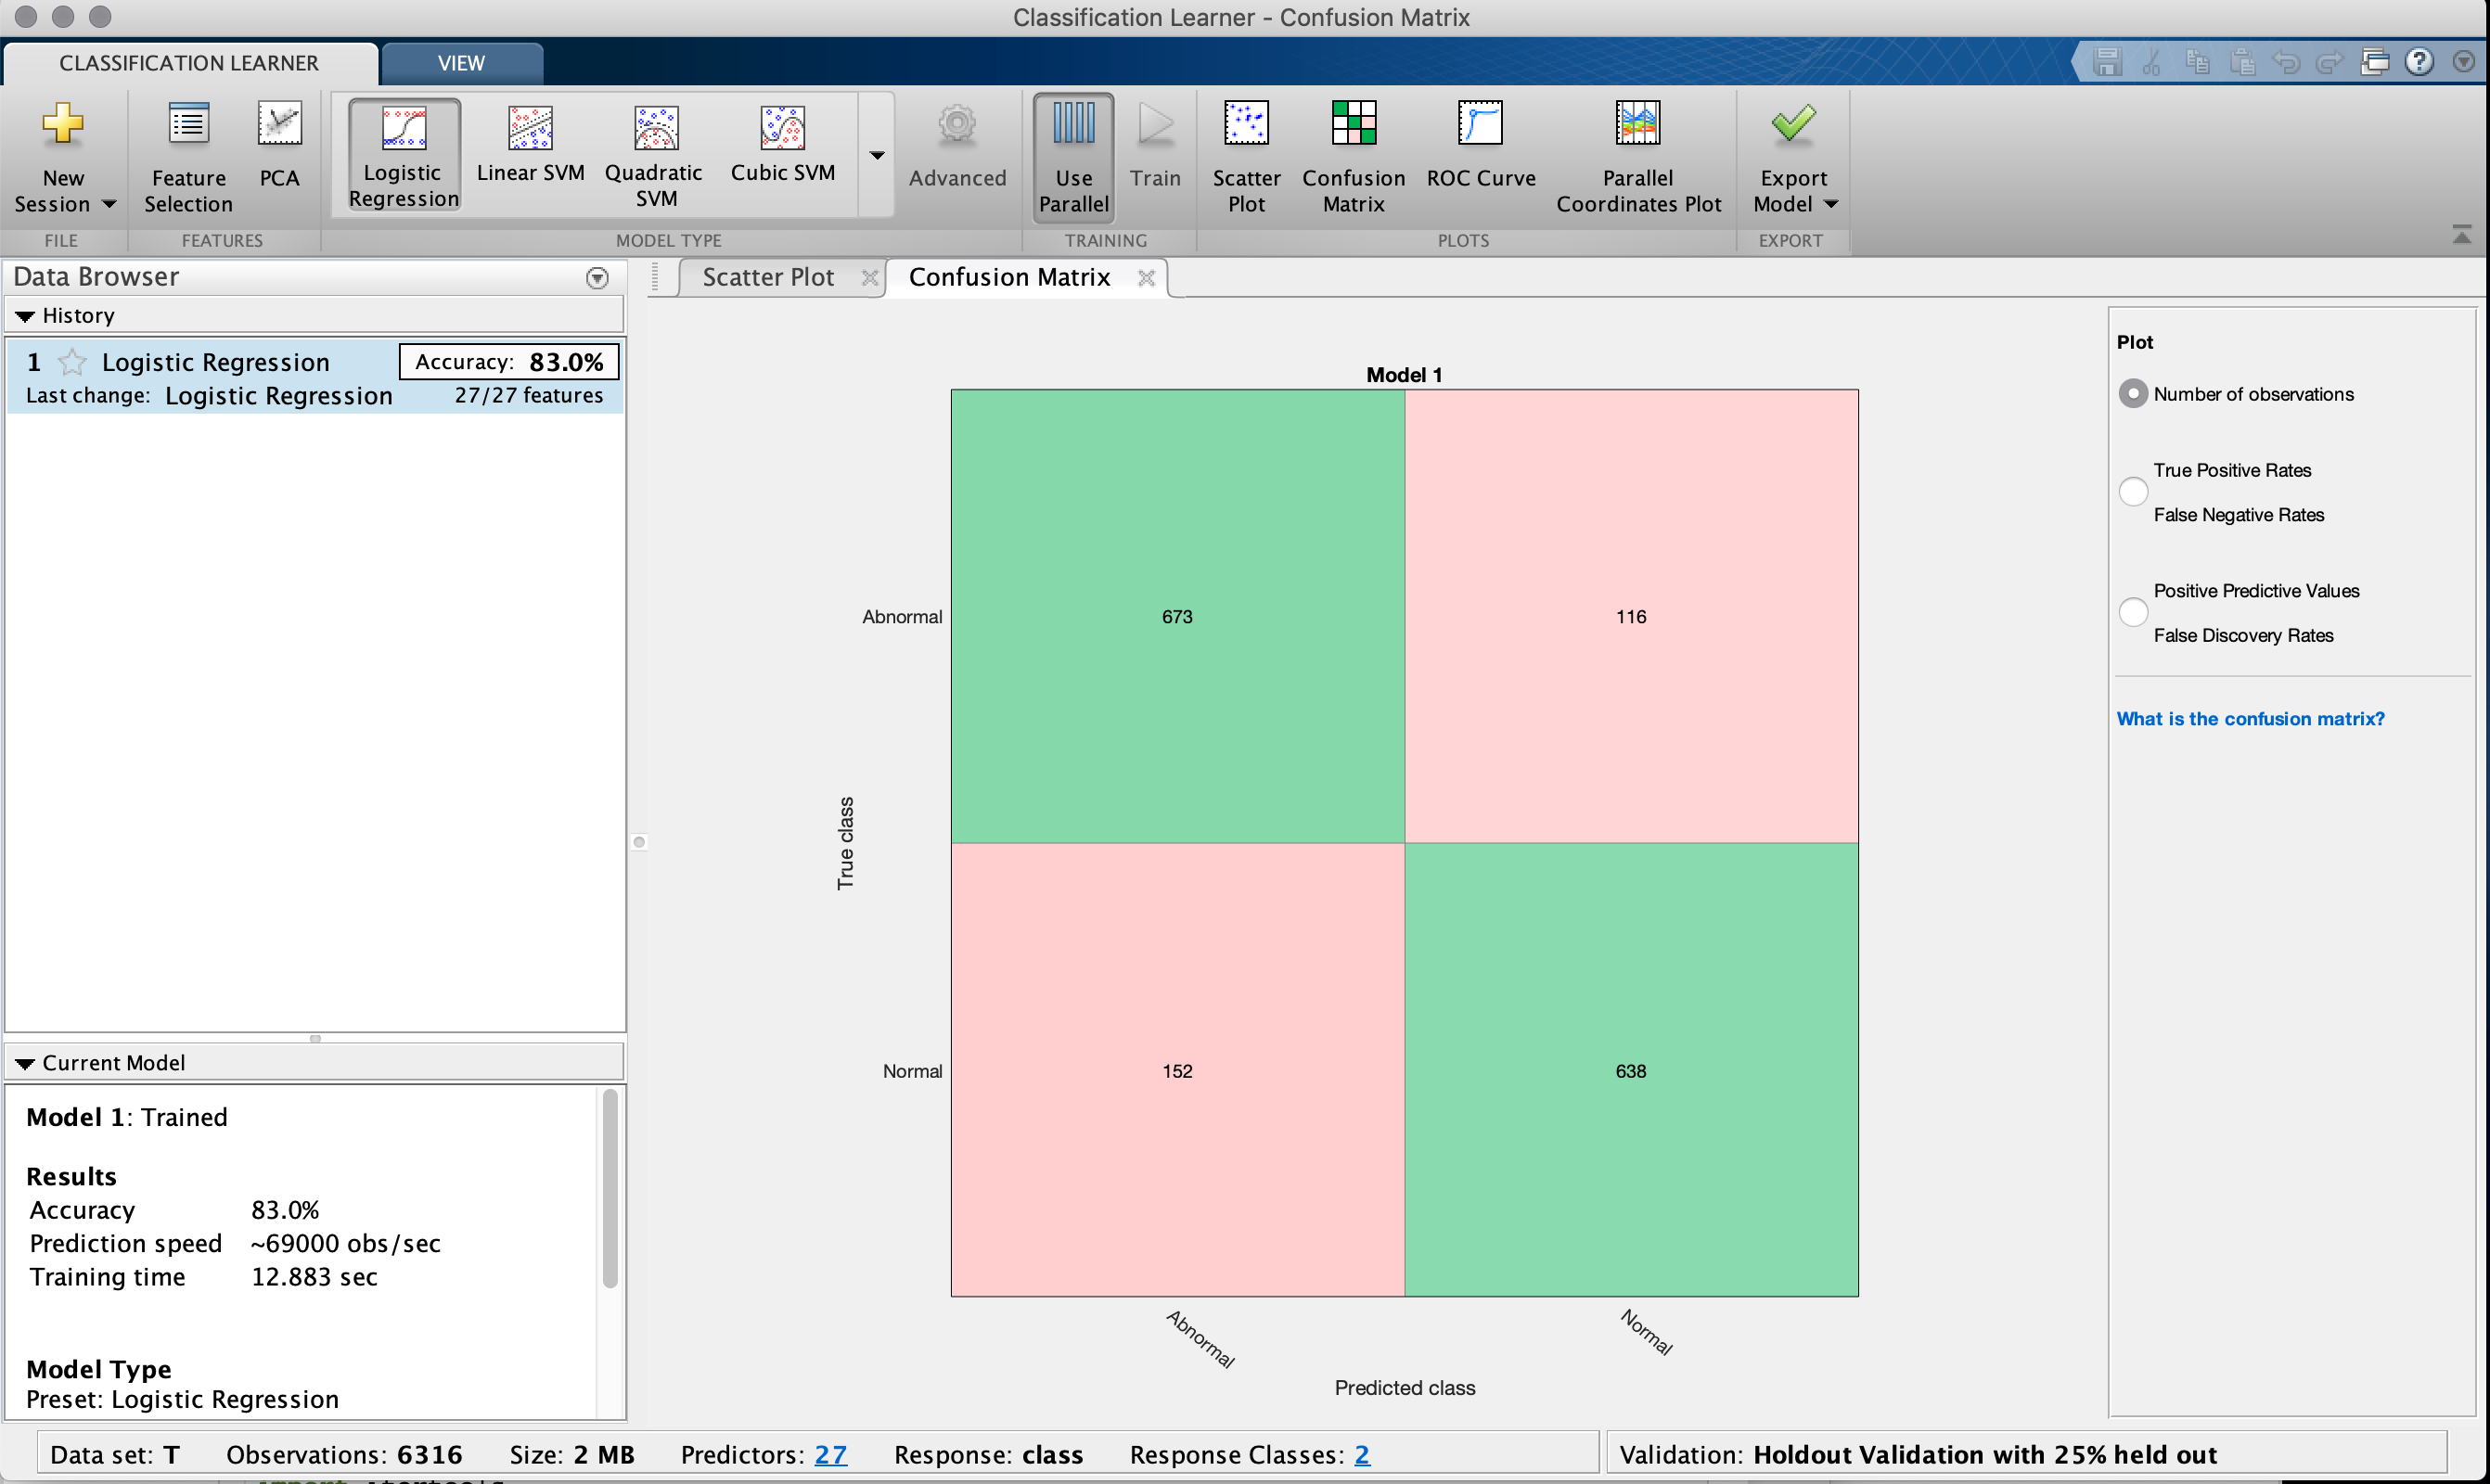

In [28]:
Image("img/Classification Learner 2.png")

The obtained Accuracy is 83.0%.

In [29]:
TN = 638
TP = 673
FP = 152
FN = 116

Sensitivity = TP/(TP+FN)
Precision   = TP/(TP+FP)
F1 = 2*(Precision*Sensitivity)/(Precision+Sensitivity)


print("Score F1:", round(F1,2))

display(Markdown('Of all patients where we predicted abnormal heart sound, what fraction has abnormal heart sound.'))
print("Precision:", 100*round(Precision,3),"%")

display(Markdown('Of all patients that have abnormal heart sound, what fraction did we correctly detect.'))
print("Recall/Sensitivity:", 100*round(Sensitivity,3),"%")

Score F1: 0.83


Of all patients where we predicted abnormal heart sound, what fraction has abnormal heart sound.

Precision: 81.6 %


Of all patients that have abnormal heart sound, what fraction did we correctly detect.

Recall/Sensitivity: 85.3 %


Summary:

| Tool | Accurancy | $F_{1}$ score | Precision | Recall/Sensitivity |
| :---    | :-----: | :-----: | :-----: | -----: |
| Matlab R2018b Statistics and Machine Learning Toolbox               Version 11.4   |   83% |   0.83  |  81.6%  |  85.3% |
| scikit-learn version 0.20.1 |   82.8% |   0.81  |  81.0%  |  85.3% |

Similar results are obtained using the Matlab Classification Learner.

---

# [EOF]